# Ex. No: 01
# Image Handling and Pixel Transformations Using OpenCV  

**Name:** Prakash C    **Reg. No:** 212223240122


## Dr. Michael Mahesh K Saveetha Engineering College
- michaelmaheshk@gmail.com 
- 19AI413-Digital Image Processing Techincs 

- EVEN SEM ( Slot: 4D1-1 & 4K1-1)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Read the image as grayscale
bgr_img = cv2.imread('Eagle_in_Flight.jpg')

In [3]:
bgr_img.shape

(600, 768, 3)

In [4]:
bgr_img.size

1382400

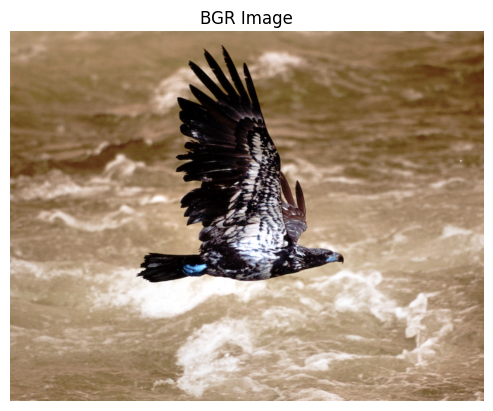

In [5]:
# 3. Display the grayscale image
plt.imshow(bgr_img)
plt.title('BGR Image')
plt.axis('off')
plt.show()

In [6]:
rgb_color_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

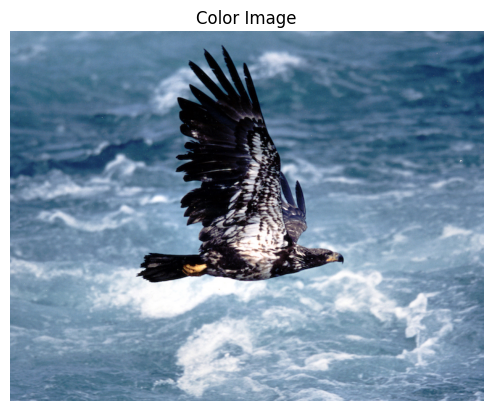

In [7]:
plt.imshow(rgb_color_img)
plt.title('Color Image')
plt.axis('off')
plt.show()

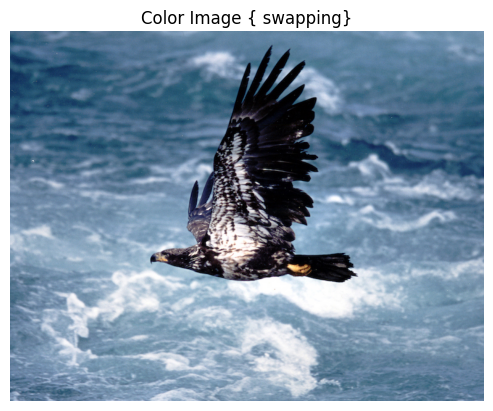

In [8]:
plt.imshow(rgb_color_img[:,::-1])
plt.title('Color Image { swapping}')
plt.axis('off')
plt.show()

In [9]:
# Save the image
cv2.imwrite('output_image.jpg', rgb_color_img)

True

In [10]:
# Read the saved image as color using cvtColor
jpg_img = cv2.imread('output_image.jpg')

saved_color_img = cv2.cvtColor(jpg_img, cv2.COLOR_BGR2RGB)

In [11]:
saved_color_img.shape

(600, 768, 3)

In [12]:
# 7. Crop image (Assuming region manually)
# Replace coordinates with actual crop for Eagle
cropped_img = saved_color_img[50:425,200:550]  # example coordinates

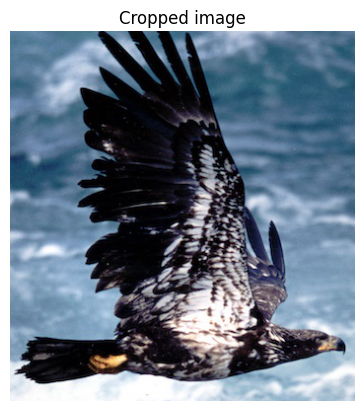

In [13]:
plt.imshow(cropped_img[:,:,::-1])
plt.title('Cropped image')
plt.axis('off')
plt.show()

In [14]:
cropped_img.shape

(375, 350, 3)

In [15]:
# 8. Resize image by 2x
resized_img = cv2.resize(cropped_img, None, fx=50, fy=50, interpolation=cv2.INTER_LINEAR)

In [16]:
resized_img.shape

(18750, 17500, 3)

In [17]:
# 9. Flip the image horizontally
flipped_img = cv2.flip(cropped_img, 1)

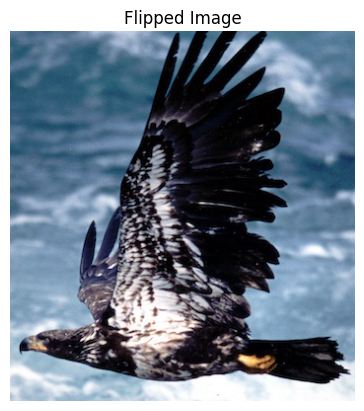

In [18]:
plt.imshow(flipped_img[:,:,::-1])
plt.title('Flipped Image')
plt.axis('off')
plt.show()

In [19]:
# 9. Flip the image horizontally

img_eagle_flipped_horz = cv2.flip(cropped_img, 1)
img_eagle_flipped_vert = cv2.flip(cropped_img, 0)
img_eagle_flipped_both = cv2.flip(cropped_img, -1)

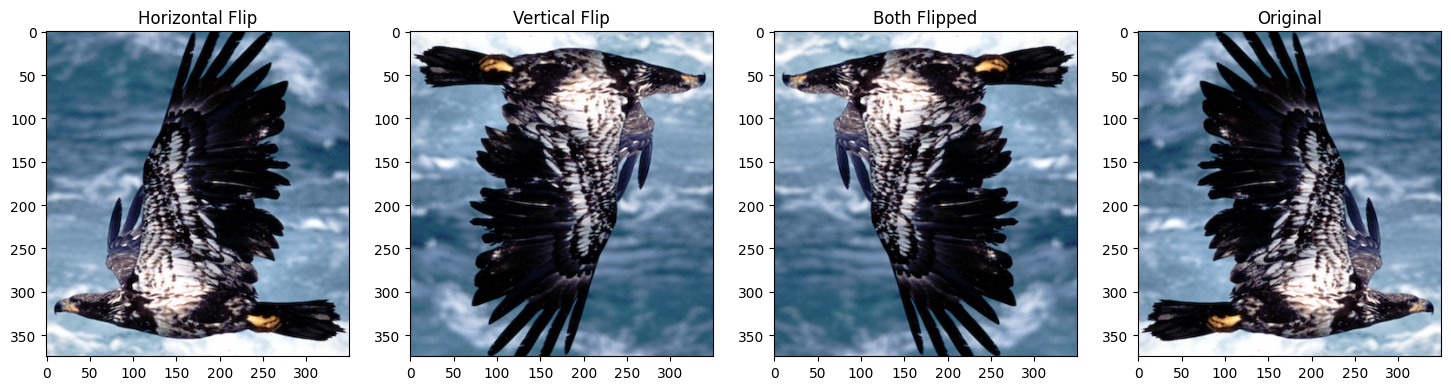

In [20]:
# Dispay the images.
plt.figure(figsize = [18, 5])
plt.subplot(141); plt.imshow(img_eagle_flipped_horz[:, :, ::-1])
plt.title('Horizontal Flip')
plt.subplot(142); plt.imshow(img_eagle_flipped_vert[:, :, ::-1])
plt.title('Vertical Flip')
plt.subplot(143); plt.imshow(img_eagle_flipped_both[:, :, ::-1])
plt.title('Both Flipped')
plt.subplot(144); plt.imshow(cropped_img[:, :, ::-1])
plt.title('Original');

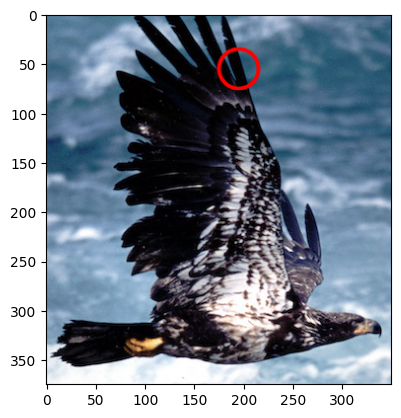

In [21]:
# Make a copy of the original image.
image_circle = cropped_img.copy()

# img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])

# Draw a red circle.
image_circle = cv2.circle(image_circle, (195, 55), 20, (0,0,255), thickness = 2, lineType = cv2.LINE_AA)


plt.imshow(image_circle[:, :, ::-1]);

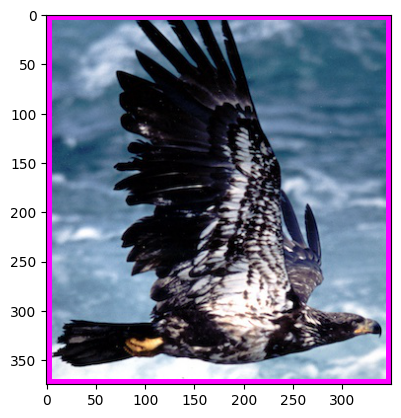

In [22]:
yellow  = (0, 255, 255)
red     = (0, 0, 255)
magenta = (255, 0, 255)
green   = (0, 255, 0)

# img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])  (Syntex) 

# Make a copy of the original image.
image_rectangle = cropped_img.copy()

# Draw a magenta rectangle.
image_rectangle = cv2.rectangle(image_rectangle, (0,0), (350, 375), magenta, thickness = 10, lineType = cv2.LINE_8)

# Display the annotated image.
plt.imshow(image_rectangle[:, :, ::-1]);

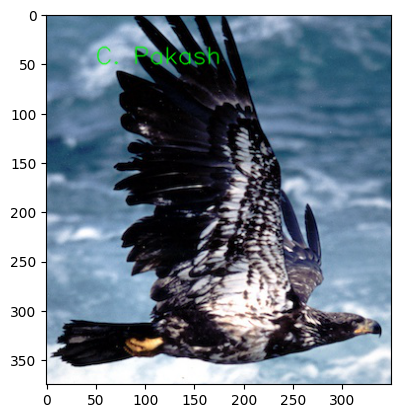

In [23]:
# 11. Add text
# img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])


# Make a copy of the original image.
image_text = cropped_img.copy()

# Add text to the image.
text = 'C. Pakash'
font_face = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = green
font_thickness = 1

image_text = cv2.putText(image_text, text, (50, 50), font_face, font_scale, font_color, font_thickness, cv2.LINE_AA)

# Display the annotated image.
plt.imshow(image_text[:, :, ::-1]);


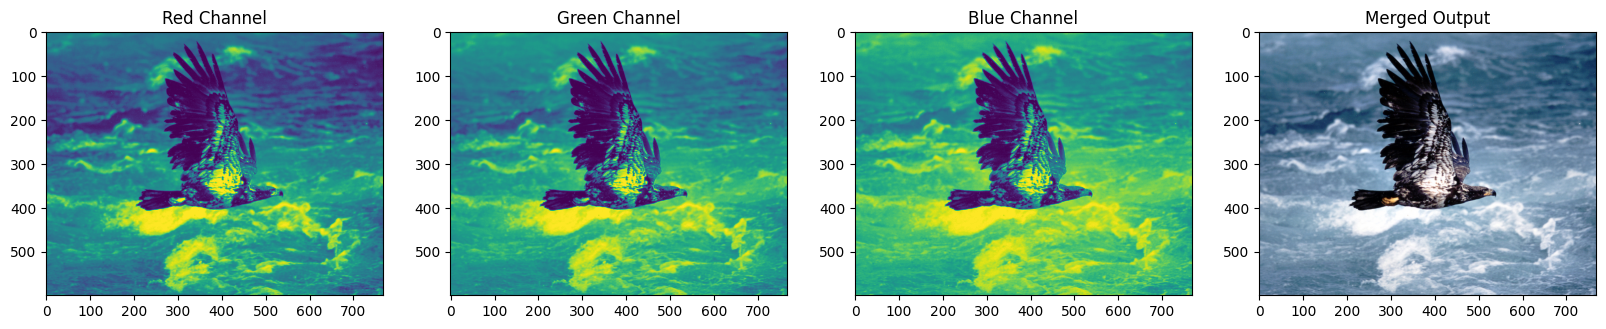

In [24]:
# Split the image into the B,G,R components.
img_bgr = cv2.imread('Eagle_in_Flight.jpg', cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_bgr)

# Show the channels.
plt.figure(figsize = [20, 10])
plt.subplot(141); plt.imshow(r); plt.title('Red Channel')
plt.subplot(142); plt.imshow(g); plt.title('Green Channel')
plt.subplot(143); plt.imshow(b); plt.title('Blue Channel')

# Merge the individual channels into a BGR image.
imgMerged = cv2.merge((r, g, b))

# Display the merged output.
plt.subplot(144)
plt.imshow(imgMerged)
plt.title('Merged Output');

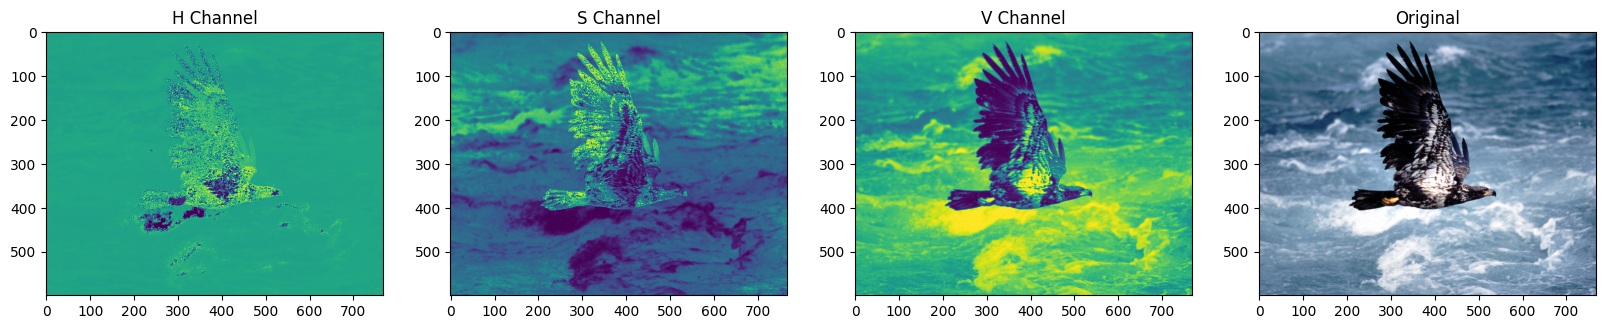

In [25]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components.
h, s, v = cv2.split(img_hsv)

# Display the channels.
plt.figure(figsize = [20, 5])
plt.subplot(141); plt.imshow(h); plt.title('H Channel')
plt.subplot(142); plt.imshow(s); plt.title('S Channel')
plt.subplot(143); plt.imshow(v); plt.title('V Channel')

# Display the original image.
plt.subplot(144); plt.imshow(img_bgr[:, :, ::-1]); plt.title('Original');

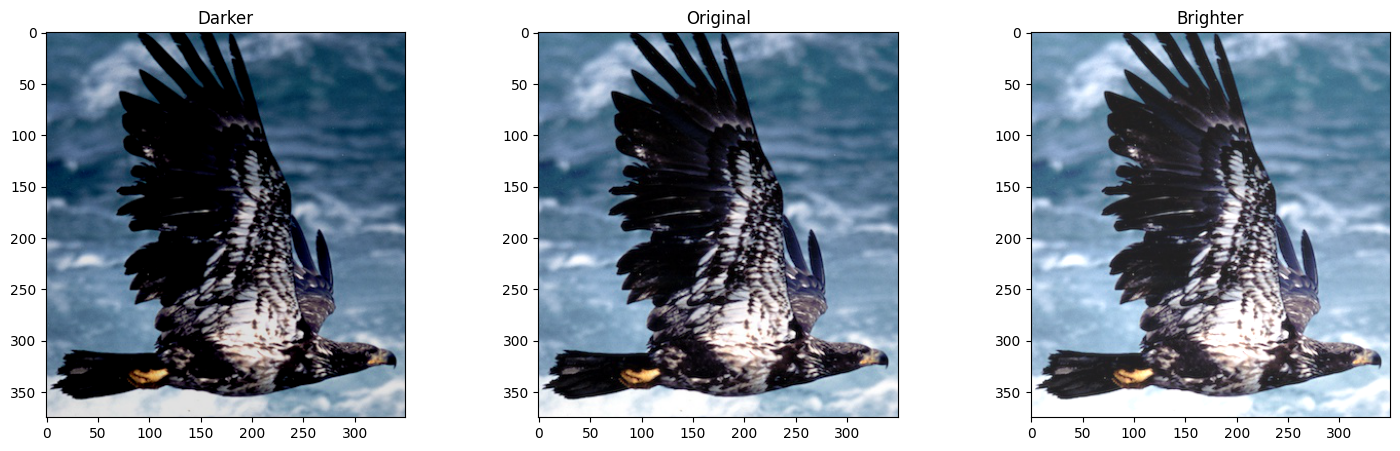

In [26]:

# dst = cv2.add(src1, src2[, dst[, mask[, dtype]]])

# Create a matrix with constant intensity.
matrix = np.ones(cropped_img.shape, dtype = 'uint8') * 30

# Create brighter and darker images.
img_brighter = cv2.add(cropped_img, matrix)
img_darker   = cv2.subtract(cropped_img, matrix)

# Display the images
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_darker[:, :, ::-1]);   plt.title('Darker')
plt.subplot(132); plt.imshow(cropped_img[:, :, ::-1]);          plt.title('Original')
plt.subplot(133); plt.imshow(img_brighter[:, :, ::-1]); plt.title('Brighter');

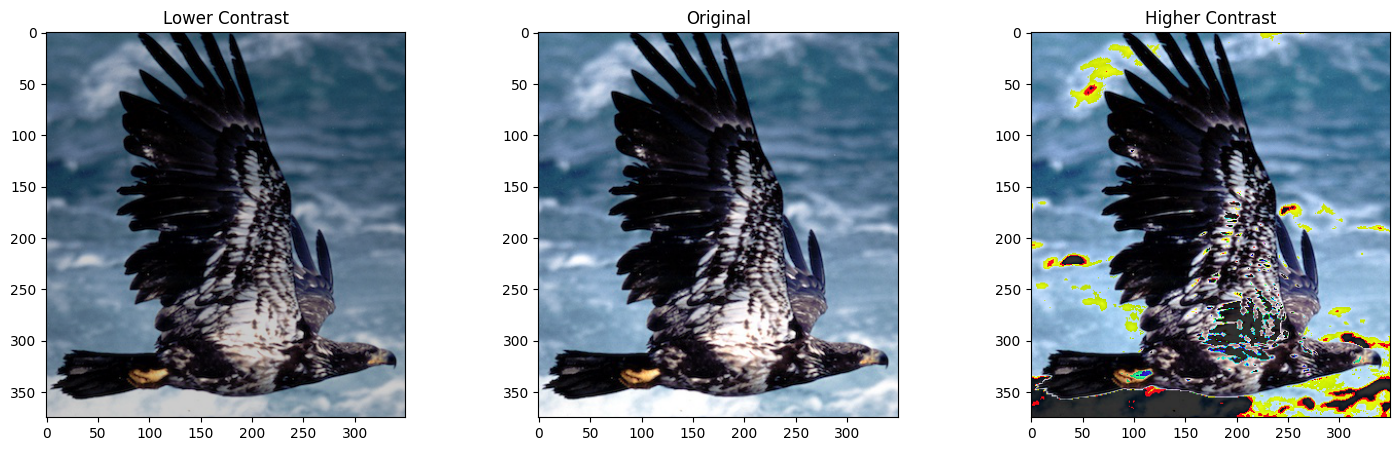

In [27]:
# dst = cv2.multiply(src1, src2[, dst[, scale[, dtype]]])


# Create matrices with a constant scale factor.
matrix1 = np.ones(cropped_img.shape) * 0.8
matrix2 = np.ones(cropped_img.shape) * 1.2

# Create lower and higher contrast images.
img_lower  = np.uint8(cv2.multiply(np.float64(cropped_img), matrix1))
img_higher = np.uint8(cv2.multiply(np.float64(cropped_img), matrix2))

# Display the images.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(cropped_img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');